<a href="https://colab.research.google.com/github/HoDoDuyDung/Colab_Code/blob/main/ai_w4_ricecooker_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=34e6097c0589b61f0826a00b91a39b08a7cb99ba41b31d91bbf7552d77107828
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


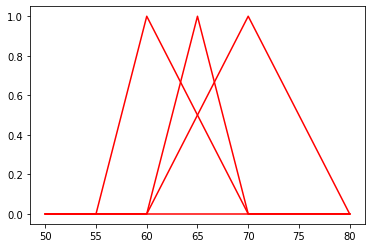

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
slow = fuzz.trimf(x,[55,60,70])
medium = fuzz.trimf(x,[60,70,80])
medium_fast = fuzz.trimf(x,[10,20,30])
full_speed = fuzz.trimf(x,[60,65,70])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label = 'slow')
plt.plot(x,medium,'r',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast,'r',linewidth = 1.5, label = 'medium_fast')
plt.plot(x,full_speed,'r',linewidth = 1.5, label = 'full_speed')


18.11111111111111


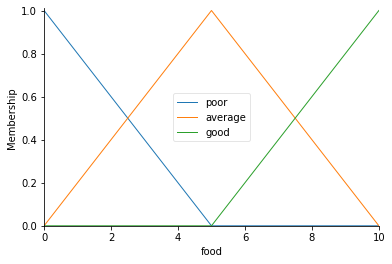

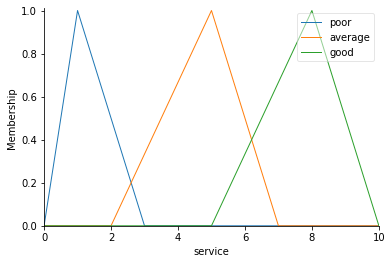

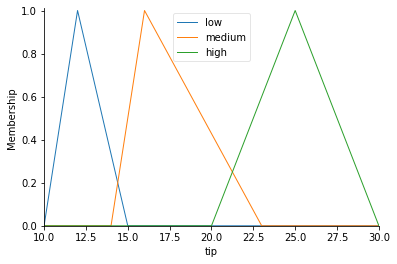

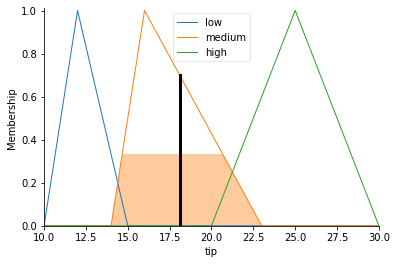

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip') 
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,1,3])
service['average'] = fuzz.trimf(service.universe,[2,5,7])
service['good'] = fuzz.trimf(service.universe,[5,8,10])
tip['low'] = fuzz.trimf(tip.universe,[10,12,15])
tip['medium'] =fuzz.trimf(tip.universe,[14,16,23])
tip['high'] = fuzz.trimf(tip.universe,[20,25,30])
food.view()
service.view()
tip.view()
rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['low'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['low'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['high'])
rule4 = ctrl.Rule(food['average'] & service['poor'],tip['low'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['medium'])
rule6 = ctrl.Rule(food['average'] & service['good'],tip['high'])
rule7 = ctrl.Rule(food['good'] & service['poor'],tip['medium'])
rule8 = ctrl.Rule(food['good'] & service['average'],tip['high'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['high'])
#lap bang rule
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 5
tipping.input['service'] = 3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

46.3888888888889


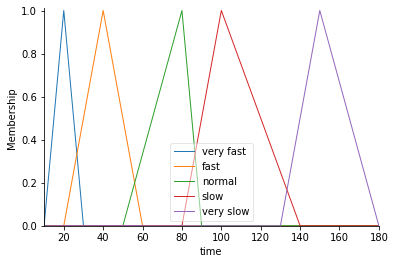

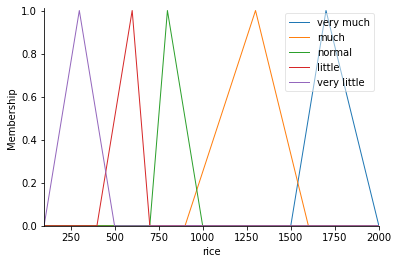

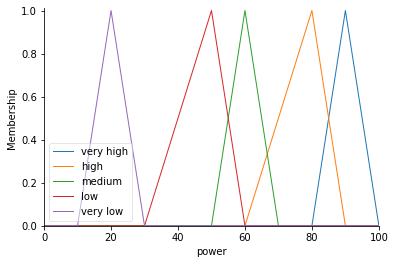

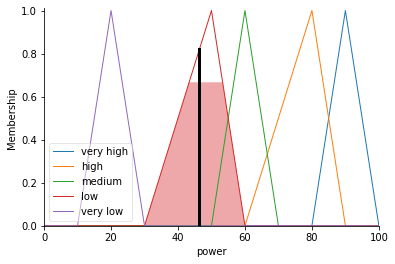

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power') 
time['very fast'] = fuzz.trimf(time.universe,[10,20,30])
time['fast'] = fuzz.trimf(time.universe,[20,40,60])
time['normal'] = fuzz.trimf(time.universe,[50,80,90])
time['slow'] = fuzz.trimf(time.universe,[80,100,140])
time['very slow'] = fuzz.trimf(time.universe,[130,150,180])
rice['very much'] = fuzz.trimf(rice.universe,[1500,1700,2000])
rice['much'] = fuzz.trimf(rice.universe,[900,1300,1600])
rice['normal'] = fuzz.trimf(rice.universe,[700,800,1000])
rice['little'] = fuzz.trimf(rice.universe,[400,600,700])
rice['very little'] = fuzz.trimf(rice.universe,[100,300,500])
power['very high'] = fuzz.trimf(power.universe,[80,90,100])
power['high'] = fuzz.trimf(power.universe,[60,80,90])
power['medium'] =fuzz.trimf(power.universe,[50,60,70])
power['low'] = fuzz.trimf(power.universe,[30,50,60])
power['very low'] = fuzz.trimf(power.universe,[10,20,30])
time.view()
rice.view()
power.view()
rule1 = ctrl.Rule(time['very fast'] & rice['very much'],power['very high'])
rule2 = ctrl.Rule(time['very fast'] & rice['much'],power['very high'])
rule3 = ctrl.Rule(time['very fast'] & rice['normal'],power['high'])
rule4 = ctrl.Rule(time['very fast'] & rice['little'],power['high'])
rule5 = ctrl.Rule(time['very fast'] & rice['very little'],power['medium'])
rule6 = ctrl.Rule(time['fast'] & rice['very much'],power['very high'])
rule7 = ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['normal'],power['medium'])
rule9 = ctrl.Rule(time['fast'] & rice['little'],power['medium'])
rule10 = ctrl.Rule(time['fast'] & rice['very little'],power['low'])
rule11 = ctrl.Rule(time['normal'] & rice['very much'],power['high'])
rule12 = ctrl.Rule(time['normal'] & rice['much'],power['high'])
rule13 = ctrl.Rule(time['normal'] & rice['normal'],power['low'])
rule14 = ctrl.Rule(time['normal'] & rice['little'],power['low'])
rule15 = ctrl.Rule(time['normal'] & rice['very little'],power['very low'])
rule16 = ctrl.Rule(time['slow'] & rice['very much'],power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['much'],power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['normal'],power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['little'],power['very low'])
rule20 = ctrl.Rule(time['slow'] & rice['very little'],power['very low'])
rule21 = ctrl.Rule(time['very slow'] & rice['very much'],power['medium'])
rule22 = ctrl.Rule(time['very slow'] & rice['much'],power['medium'])
rule23 = ctrl.Rule(time['very slow'] & rice['normal'],power['very low'])
rule24 = ctrl.Rule(time['very slow'] & rice['little'],power['very low'])
rule25 = ctrl.Rule(time['very slow'] & rice['very little'],power['very low'])

#lap bang rule
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']= 100
powering.input['rice'] = 1400
powering.compute()
print(powering.output['power'])
power.view(sim = powering)